# Project: Investigate a Dataset (No-show appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset is about registering a doctor appointment and then persons attend or not to this appointment!
although, during the 2 cases they get all the instructions and the specific time to the appointment of them.

> This dataset contains information from 100k medical appointments in Brazil

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

% matplotlib inline

# Questions
- Does gender type affect attendance to the appointment?
- Does age affect attendance to the appointment?
- Does neighbourgood place affect the appointment?
- Does patients haven't a scholarship not go to the appointment?
- Does sending or not sending a message for patients affects on the attending to the appointment?


<a id='wrangling'></a>
# Data Wrangling

### Data gathering

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

### Data assessing

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [5]:
#df.shape
#before droping cloumns and some values were (110527, 14)
#after that (110526, 11)
df.shape

(110527, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> No missing values

In [7]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
df.sample(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
103668,7.573515e+14,5677713,F,2016-05-10T07:33:20Z,2016-06-07T00:00:00Z,39,CONQUISTA,1,0,0,0,0,0,Yes
63900,2.882467e+10,5662431,F,2016-05-05T08:32:01Z,2016-05-20T00:00:00Z,36,ANDORINHAS,0,0,0,0,0,0,Yes
25728,9.687656e+12,5662024,F,2016-05-05T08:01:07Z,2016-05-05T00:00:00Z,41,SÃO JOSÉ,0,1,0,0,1,0,No
70237,7.191546e+14,5729923,M,2016-05-24T07:57:41Z,2016-05-24T00:00:00Z,9,BONFIM,0,0,0,0,0,0,Yes
83182,7.943743e+13,5676354,M,2016-05-09T15:33:55Z,2016-05-30T00:00:00Z,0,ITARARÉ,0,0,0,0,0,1,Yes
53173,7.625565e+13,5540202,M,2016-04-01T17:37:01Z,2016-05-05T00:00:00Z,6,MARIA ORTIZ,0,0,0,0,0,1,Yes
31149,3.847793e+13,5693916,M,2016-05-13T07:51:41Z,2016-05-20T00:00:00Z,40,BENTO FERREIRA,0,0,0,0,0,0,Yes
28225,6.428464e+12,5748901,F,2016-05-31T07:20:39Z,2016-05-31T00:00:00Z,60,GOIABEIRAS,0,0,0,0,0,0,Yes
72963,7.666345e+13,5638048,F,2016-04-29T07:40:19Z,2016-05-13T00:00:00Z,37,CENTRO,0,0,0,0,0,0,No
98741,2.937948e+14,5783690,F,2016-06-07T14:26:05Z,2016-06-07T00:00:00Z,23,MARIA ORTIZ,0,0,0,0,0,0,No


In [19]:
df.duplicated().sum()

0

>No duplicates!

In [9]:
df.Hipertension.unique()

array([1, 0])

In [10]:
df.Scholarship.unique()

array([0, 1])

In [11]:
df.Hipertension.unique()

array([1, 0])

In [12]:
df.Diabetes.unique()

array([0, 1])

In [13]:
df.Alcoholism.unique()

array([0, 1])

In [14]:
df.Handcap.unique()

array([0, 1, 2, 3, 4])

In [15]:
df.Age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
 56     1635
 38     1629
 59     1624
 2      1618
 50     1613
 57     1603
 36     1580
 51     1567
 19     1545
 39     1536
 37     1533
 54     1530
 34     1526
 33     1524
 30     1521
 6      1521
 3      1513
 17     1509
 32     1505
 5      1489
 44     1487
 18     1487
 58     1469
 46     1460
 45     1453
        ... 
 74      602
 76      571
 75      544
 78      541
 77      527
 80      511
 81      434
 82      392
 79      390
 84      311
 83      280
 85      275
 86      260
 87      184
 89      173
 88      126
 90      109
 92       86
 91       66
 93       53
 94       33
 95       24
 96       17
 97       11
 98        6
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

> - Here the value -1 appeares once(not affects)
> - the 0 years old appears 3539 as the high number of patiens. But I think that 0 age means that this is the age of new born so it is an important value!
>
>because there are new born with have genetically diabetic

# The issues appeared from the assessing phase
>- The column Handcap is written in a wrong way. It should be Handicap.
>- The column Hipertension is written in a wrong way. It should be Hypertension.
>- The name of the column No-show should be written as No_show.
>- there are some unnesessery columns should to be dropped.
>- PatientId column should be string not float or int!
>- Scholarship, Hypertension, Diabetes, Alcoholism columns should be boolean.
>- The minimum age is -1 and this is a wrong value.

### Data cleaning

In [20]:
#Renaming some columns
df.rename(columns = {'Handcap': 'Handicap','Hipertension': 'Hypertension', 'No-show': 'No_show'}, inplace = True)

In [26]:
#Convert Scholarship, Hypertension, Diabetes, Alcoholism columns to boolean.
columns = ['Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'SMS_received']
for column in columns:
    df[column] = df[column].astype('category')


In [28]:
df['Handicap']=df['Handicap'].astype('int64')

In [32]:
df[df['Age'] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [33]:
df.drop(axis = 0, index = 99832, inplace = True)

>Removing the rows of Age value lower than zero!

<a id='eda'></a>
## Exploratory Data Analysis

In [37]:
#Separate the No_show to 2 groups:
#one for the attended patients and the other for not attended ones
Attended = df.No_show == 'No'
Not_Attended = df.No_show == 'Yes'

In [38]:
df['No_show'][Attended].count()

88207

In [39]:
df['No_show'][Not_Attended].count()

22319

>The number of patients attended to the doctor appointment is (88207) as that is greater than the number of ones didn't attend (22319)
- So the relation is ~ 4(attended):1(didn't attend) 

### Research Question 1 (Does gender type affect attendance to the appointment?)

In [40]:
df.Gender.value_counts()

F    71839
M    38687
Name: Gender, dtype: int64

In [41]:
def Gender_plotting(axes, x, color, xlabel, ylabel, label):
    axes.hist(x, color = color, label = label)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    plt.legend()


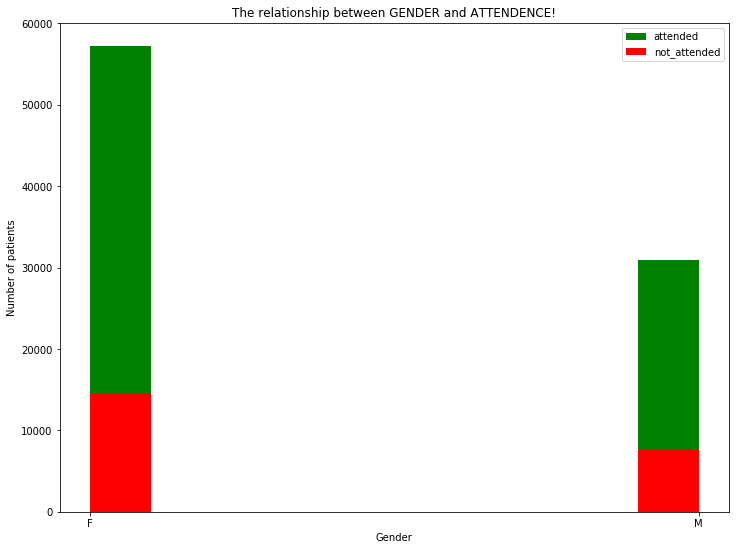

In [42]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 9)

Gender_plotting(ax, df['Gender'][Attended], 'green', 'Gender', 'Number of patients', 'attended')
ax.set_title('The relationship between GENDER and ATTENDENCE!')

Gender_plotting(ax, df['Gender'][Not_Attended], 'red', 'Gender', 'Number of patients', 'not_attended')

plt.show()


>The number of female pateints who attended the appointment is greater than the number of male
```
- The total number of female patients is 71839 and the attended ones = ~58000 as 80% attendance.
- the total number of male patients is 38687 and the attended ones = ~31000 as 80% attendance also!
```

> From the previous histogram we find that femal represent the most number of pations than male ones.

### Research Question 2  (Does age affect attendance?)

In [46]:
df['No_show'][Attended].value_counts()

No    88207
Name: No_show, dtype: int64

In [47]:
def Age_plotting(axes, x, color, xlabel, ylabel, title):
    axes.hist(x, color = color)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_title(title)
    plt.show()

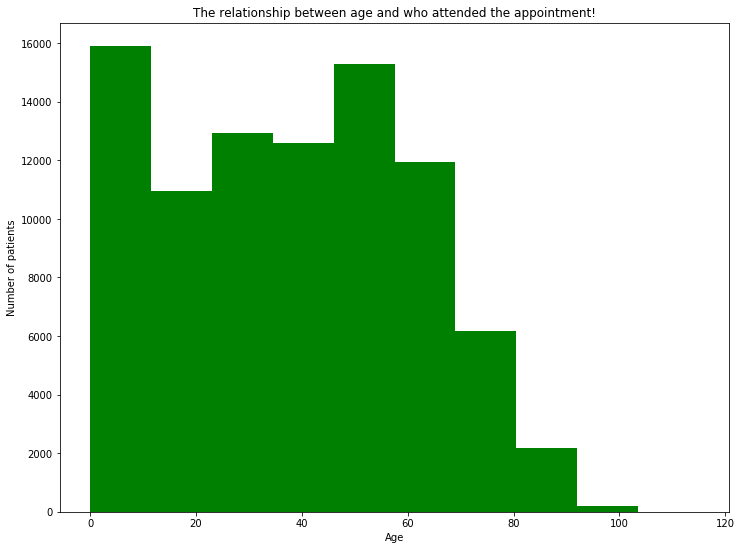

In [48]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 9)

Age_plotting(ax, df['Age'][Attended], 'green', 'Age', 'Number of patients', 'The relationship between age and who attended the appointment!')

> From the previous histogram we find that:
- From 0 to 14 years old are the highest attendance (~16k)
- From 14 to 70 years old are high attendance also but less than the first one.
- From 63 to above years old the number of attendance highly decreases.

In [49]:
df['No_show'][Not_Attended].value_counts()

Yes    22319
Name: No_show, dtype: int64

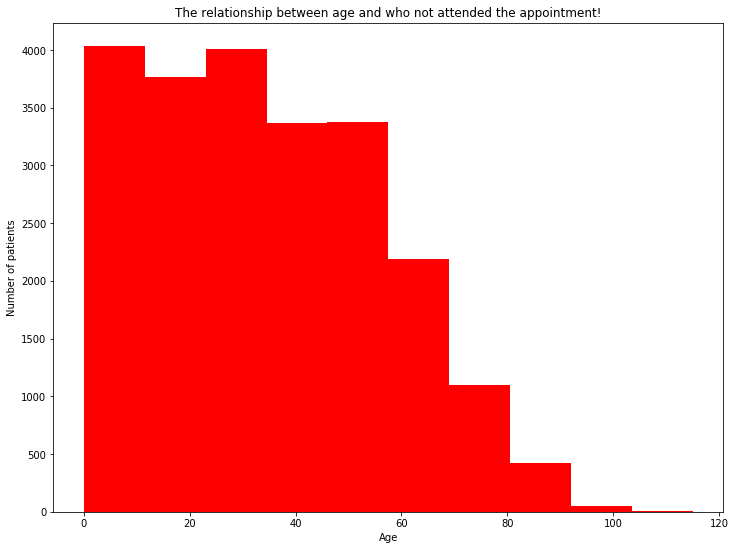

In [50]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 9)

Age_plotting(ax, df['Age'][Not_Attended], 'red', 'Age', 'Number of patients', 'The relationship between age and who not attended the appointment!')

> From the previous histogram we also find that:
- From 0 to 14 years old are the highest record of not attendance (~4k)
- From 14 to 70 years old are high not attendance also but less than the first one.
- From 63 to above years old the number of not attendance highly decreases.

>- So from the previous 2 histograms we find that the less the age is small the more attendance and the more not attendance also.
- The more the age is big the less attandance and not attandance to the appointment.

### Research Question 3  (Does neighbourhood place affect the appointment?)

In [51]:
df.Neighbourhood.value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
CENTRO                         3334
TABUAZEIRO                     3132
SANTA MARTHA                   3131
JESUS DE NAZARETH              2853
BONFIM                         2773
SANTO ANTÔNIO                  2746
SANTO ANDRÉ                    2571
CARATOÍRA                      2565
JABOUR                         2509
SÃO PEDRO                      2448
ILHA DO PRÍNCIPE               2266
NOVA PALESTINA                 2264
ANDORINHAS                     2262
DA PENHA                       2217
ROMÃO                          2214
GURIGICA                       2018
SÃO JOSÉ                       1977
BELA VISTA                     1907
MARUÍPE                        1902
FORTE SÃO JOÃO                 1889
ILHA DE SANTA MARIA            1885
SÃO CRISTÓVÃO                  1836
REDENÇÃO                    

In [53]:
def Neighbourhood(axes, x, xlabel, title):
    x.plot(kind = 'barh')
    axes.set_xlabel(xlabel)
    axes.set_title(title)
    plt.show()

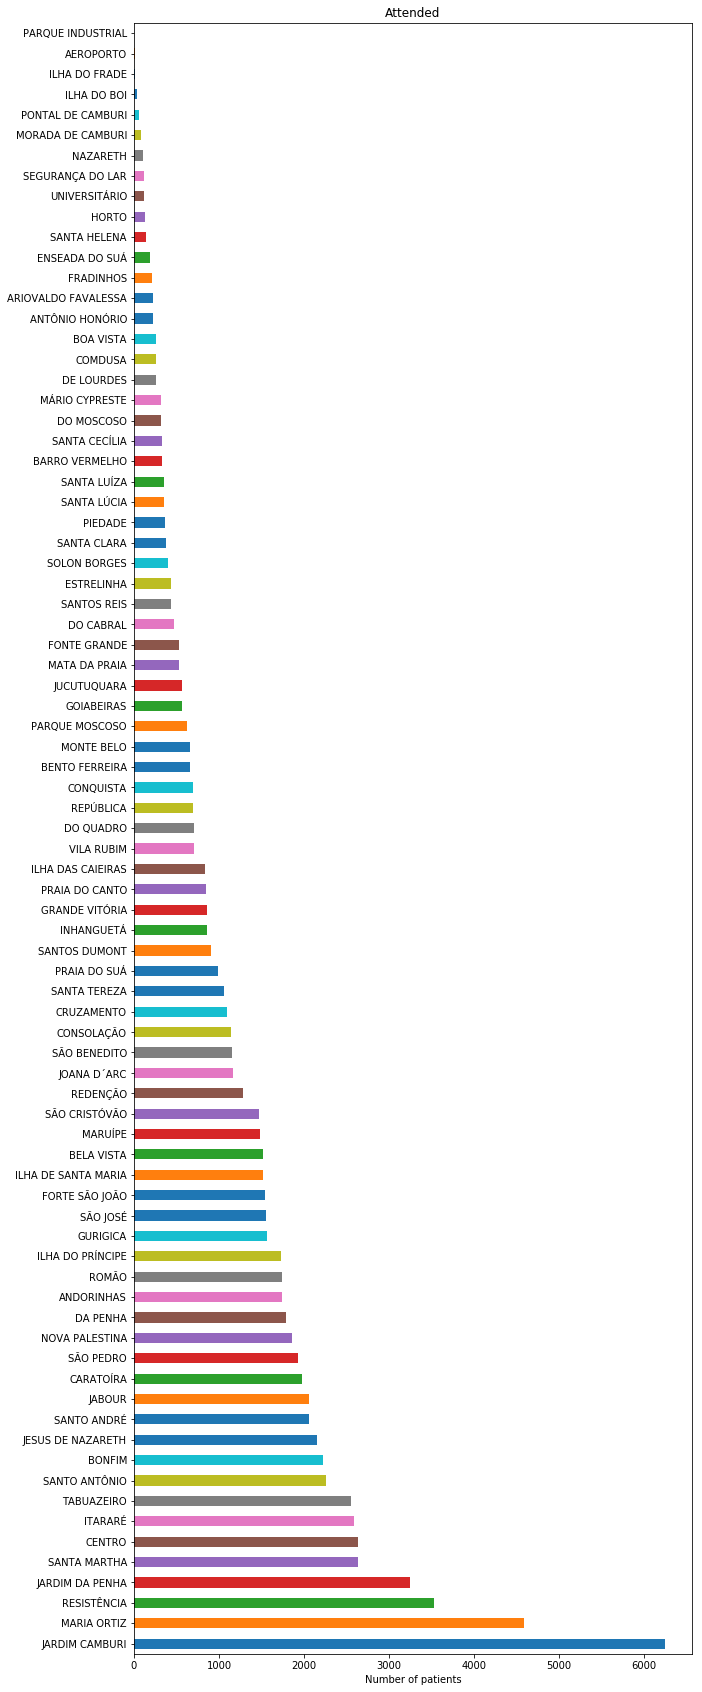

In [54]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 30)
Neighbourhood(ax, df['Neighbourhood'][Attended].value_counts(),'Number of patients', 'Attended')


>From the above barh chart we find that JARDIM CAMBURI is the most neighbourhood for attending the appointments.

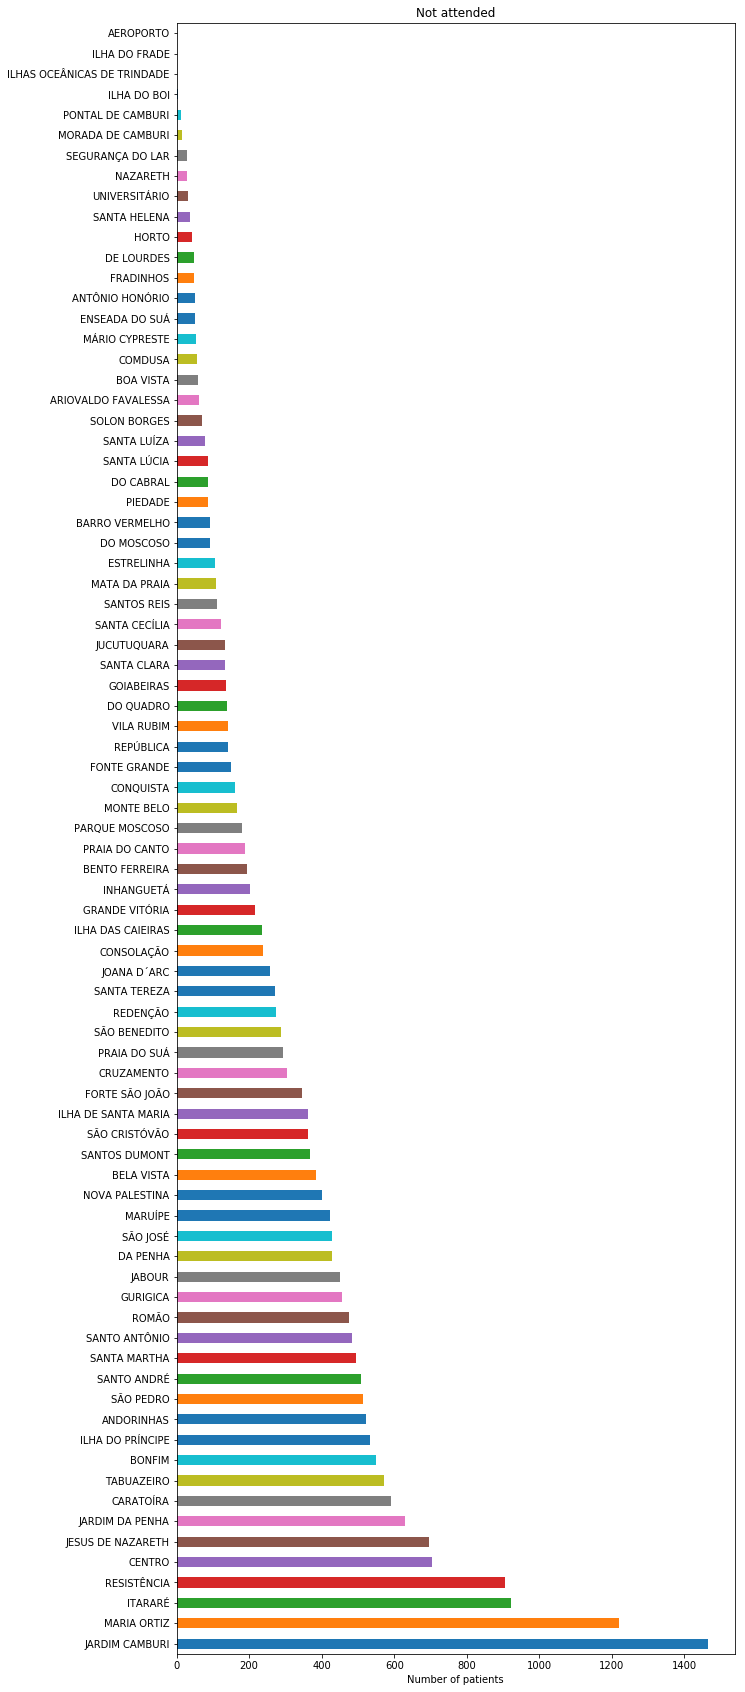

In [55]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 30)
Neighbourhood(ax, df['Neighbourhood'][Not_Attended].value_counts(),'Number of patients', 'Not attended')


>From the above barh chart we find that JARDIM CAMBURI is the most neighbourhood for not attending the appointments also.

### Research Question 4  (Does patients haven't a scholarship not go to the appointment?)

In [58]:
data = df.groupby('No_show')['Scholarship'].value_counts()
notAttend_notScholership= data['Yes'][0]
notAttend_hasScholership= data['Yes'][1]

In [59]:
def PieChart(x, y, labels, title):
    plt.pie([x,y], explode = (0.1, 0), labels = labels, shadow = True,autopct = '%1.1f%%')
    plt.title(title)
    plt.legend()
    plt.show()

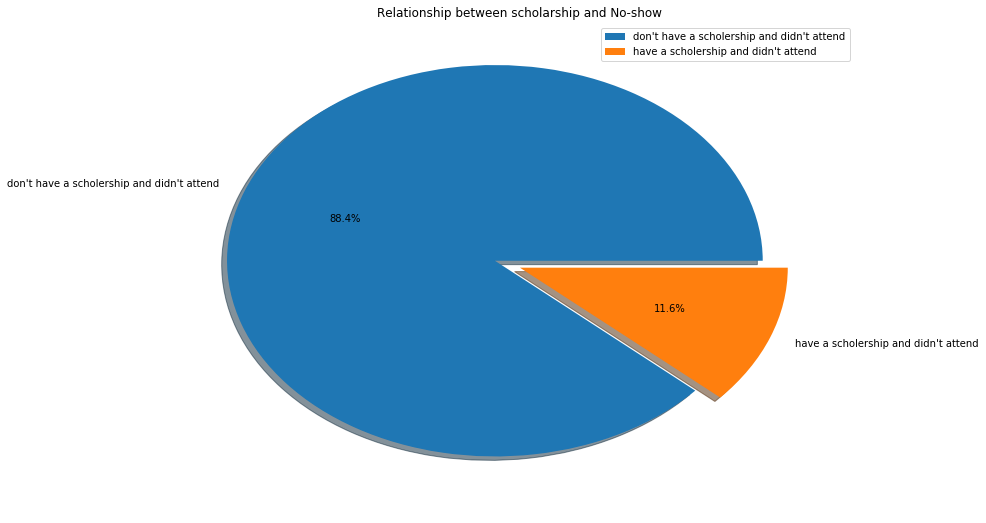

In [60]:
fig = plt.figure(figsize=(12, 9))
PieChart(notAttend_notScholership, notAttend_hasScholership, ("don't have a scholership and didn't attend", "have a scholership and didn't attend"),'Relationship between scholarship and No-show')


>From the above pie chart we find that people who didn't anttend the appointment and not have a scholorship are the most than have ones.

### Research Question 5  (Does sending a message for patients affects on the attending to the appointment?)

In [62]:
data = df.groupby('No_show')['SMS_received'].value_counts()
notAttend_notRecieved = data['Yes'][0]
notAttend_recieved = data['Yes'][1]

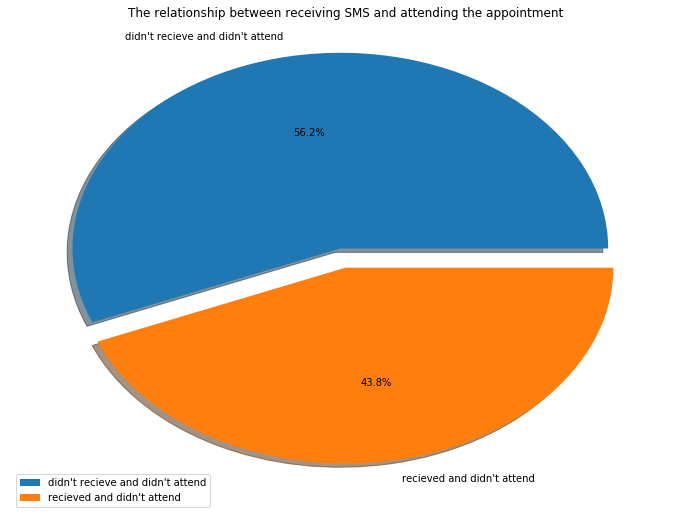

In [63]:
fig = plt.figure(figsize=(12, 9))


fig = plt.figure(figsize=(12, 9))
PieChart(notAttend_notRecieved, notAttend_recieved, ("didn't recieve and didn't attend", "recieved and didn't attend"),'The relationship between receiving SMS and attending the appointment')


>From the above pie chart we find that there is no strong relationship between sending sms and not attending the appointment.

<a id='conclusions'></a>
## Conclusions

> Finally, We can see that there are some important attributes that affects on the attending to doctor appointment operations
>
>such as:
- Age attribute(The older the age, the less attendance to a doctor appointment)
- Neighbourhood(JARDIM CAMBURI is the most neighbourhood for attending or not attending the appointments also)
- People who didn't attend the appointments and didn't receive a SMS about 56%.
- people who didn't anttend the appointment and not have a scholorship are about 88.4%.

### Limitations
- there were some names typed in a wrong way like: Handcap, Hipertension.
- there were some columns need to change its data type to make the analysis easier.
- there were some values that were out of a certain range like the Age column contain value like: -1

In [64]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0